In [1]:
import pandas as pd
import numpy as np
#from plotnine import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
    
import statsmodels.api as sm

from scipy.stats import mode

import random
 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\featuresTrain.xlsx')


In [ ]:
# best result/hyperparameter (from grid search on cross validation) for decision tree
#{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 64, 'random_state': 42}
#kappa:  0.54
#accurancy:  0.68
#with random forrest, best result around
#kappa 0.61
#accurancy 0.73

In [3]:
#training, test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])
training, test  = train_test_split(df, test_size=0.2, random_state=42)
X = training.iloc[:,:-1]
y = training.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_true = test.iloc[:,-1]

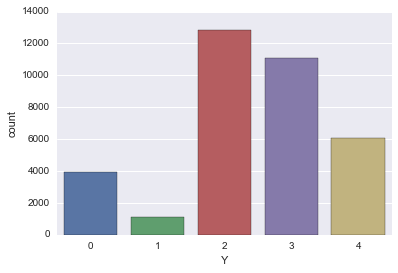

In [4]:
sns.countplot(x="Y", data=training)

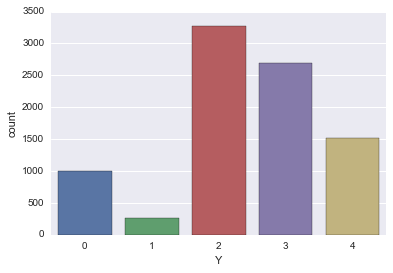

In [6]:
sns.countplot(x="Y", data=test)

In [7]:
i = 3 #minimal depth for 5 class
tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=1, max_features= None, 
                                      random_state=42, min_samples_split=2)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_test)
kappa = cohen_kappa_score(y_true, y_pred)
print("kappa for max_depth="+ str(i) + ": " + str(kappa))

kappa for max_depth=3: 0.469812354670624


In [8]:
export_graphviz(
tree_clf,
out_file="C:\\Users\\i053131\\pictures\\decisionDepth3.dot",
feature_names=X.columns,
class_names=["0", "1", "2", "3", "4"],
rounded=True,
filled=True
)
#  http://www.webgraphviz.com/
# no leaf for 1

In [24]:
i = 7 #see lower for tuning of hyperparameters
tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=20, max_features= None, 
                                      random_state=42, min_samples_split=20)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_test)
kappa = cohen_kappa_score(y_true, y_pred)
print("kappa for max_depth="+ str(i) + ": " + str(kappa))

export_graphviz(
tree_clf,
out_file="C:\\Users\\i053131\\pictures\\decisionDepth7.dot",
feature_names=X.columns,
class_names=["0", "1", "2", "3", "4"],
rounded=True,
filled=True
)


kappa for max_depth=7: 0.528180363539842


In [29]:
#hyper param from grid serach (see below)
#{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 64, 'random_state': 42}
#kappa:  0.5409871085189527
#accurancy:  0.6789869952087612

rnd_clf = RandomForestClassifier(max_depth=9, min_samples_leaf=5, max_features= None, 
                                 random_state=42, min_samples_split=64, n_estimators=1000, n_jobs=-2)
rnd_clf.fit(X, y)
y_pred_rf = rnd_clf.predict(X_test)
kappa_rf = cohen_kappa_score(y_true, y_pred_rf)

print("kappa: ",  kappa_rf)
print("accurancy: ", accuracy_score(y_true, y_pred_rf))

kappa:  0.5792565788782207
accurancy:  0.7067077344284737


In [33]:
Lk = []
La = []
rx = [100, 500, 1000, 1500, 2000]
for n in rx:
    rnd_clf = RandomForestClassifier(max_depth=9, min_samples_leaf=5, max_features= None, 
                                     random_state=42, min_samples_split=64, n_estimators=n, n_jobs=-2)
    rnd_clf.fit(X, y)
    y_pred_rf = rnd_clf.predict(X_test)
    kappa_rf = cohen_kappa_score(y_true, y_pred_rf)

    print("kappa for n_estimator  = " + str(n) + ":",  kappa_rf)
    print("accurancy for n_estimator  = " + str(n) + ":" , accuracy_score(y_true, y_pred_rf))
    Lk.append(kappa_rf)
    La.append(accuracy_score(y_true, y_pred_rf))



kappa for n_estimator  =100: 0.5801016247595085
accurancy for n_estimator  =100: 0.7073921971252567
kappa for n_estimator  =500: 0.5779016612581664
accurancy for n_estimator  =500: 0.7057951174994296
kappa for n_estimator  =1000: 0.5792565788782207
accurancy for n_estimator  =1000: 0.7067077344284737
kappa for n_estimator  =1500: 0.5786477370799362
accurancy for n_estimator  =1500: 0.7062514259639516
kappa for n_estimator  =2000: 0.5786214498090132
accurancy for n_estimator  =2000: 0.7062514259639516


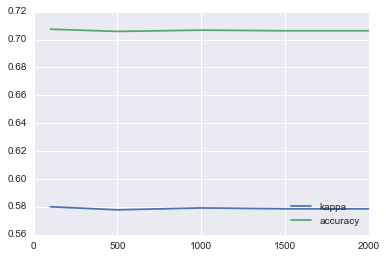

In [34]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

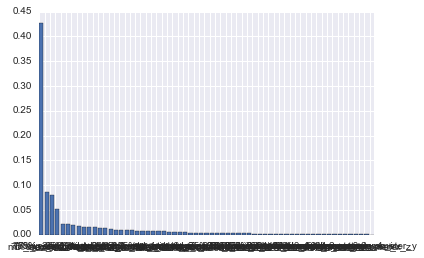

,importance
75%_eeg_1,0.426570
75%_eeg_2,0.087134
min_eeg_1,0.079359
min_accelerometer_x,0.052833
75%_accelerometer_z,0.022495
25%_po_ir,0.022386
25%_eeg_2,0.019027
max_accelerometer_x,0.017304
75%_po_ir,0.016505
std_po_ir,0.016190


In [28]:
importances = rnd_clf.feature_importances_
feature_importances = pd.DataFrame(importances, index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances.index, feature_importances["importance"])
plt.show()

feature_importances.head(10)

In [35]:
Lk = []
La = []
rx = [100, 500, 1000, 1500, 2000, 10000]
for n in rx:
    rnd_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, max_features= None, 
                                     random_state=42, min_samples_split=64, n_estimators=n, n_jobs=-2)
    rnd_clf.fit(X, y)
    y_pred_rf = rnd_clf.predict(X_test)
    kappa_rf = cohen_kappa_score(y_true, y_pred_rf)

    print("kappa for n_estimator  = " + str(n) + ":",  kappa_rf)
    print("accurancy for n_estimator  = " + str(n) + ":" , accuracy_score(y_true, y_pred_rf))
    Lk.append(kappa_rf)
    La.append(accuracy_score(y_true, y_pred_rf))

kappa for n_estimator  = 100: 0.6089808998363531
accurancy for n_estimator  = 100: 0.7259867670545289
kappa for n_estimator  = 500: 0.6091497928047281
accurancy for n_estimator  = 500: 0.7259867670545289
kappa for n_estimator  = 1000: 0.6078738543089754
accurancy for n_estimator  = 1000: 0.7250741501254848
kappa for n_estimator  = 1500: 0.6076232203126972
accurancy for n_estimator  = 1500: 0.7248459958932238
kappa for n_estimator  = 2000: 0.6072521164942677
accurancy for n_estimator  = 2000: 0.7246178416609628
kappa for n_estimator  = 10000: 0.609290289678883
accurancy for n_estimator  = 10000: 0.7261008441706593


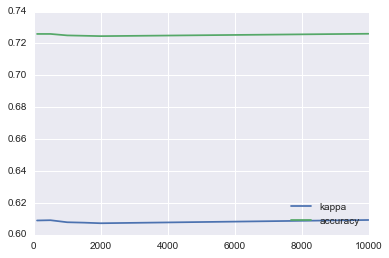

In [36]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

In [10]:
#palette = plt.get_cmap('Set1')
def treez(X, y, X_test, y_true, d=18, msl=100, mss=100):
    L = range(3, d)
    for l in range(2, mss, 10):
        print("min_sample_slit: "+ str(l))
        for j in range(1, msl, 10):
            kappa = []
            for i in L:
                tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features= None, 
                                                  random_state=42, min_samples_split=l)
                tree_clf.fit(X, y)
                y_pred = tree_clf.predict(X_test)
                kappa.append(cohen_kappa_score(y_true, y_pred))
                #print("kappa for max_depth="+ str(i) + ": " + str(kappa))fig = plt.figure()
            plt.plot(L, kappa, label = str(j))

        plt.legend(loc='lower right')
        plt.show()

min_sample_slit: 2


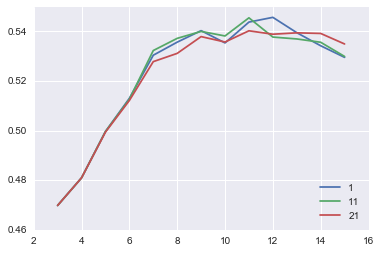

min_sample_slit: 12


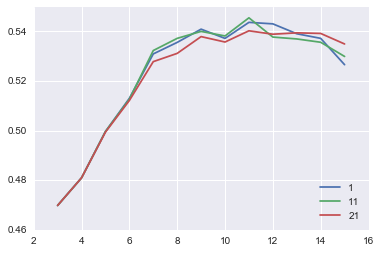

min_sample_slit: 22


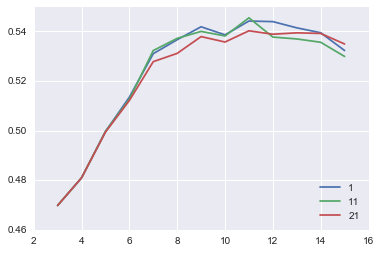

In [11]:
treez(X, y, X_test, y_true, d= 16, msl=31, mss = 31)

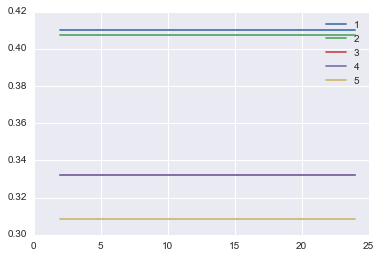

In [50]:
L = range(2, 25)

for j in range(1,6):
    kappa = []
    for i in L:
        tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j/10, max_features= None, 
                                          random_state=42, min_samples_split=2)
        tree_clf.fit(X, y)
        y_pred = tree_clf.predict(X_test)
        kappa.append(cohen_kappa_score(y_true, y_pred))
        #print("kappa for max_depth="+ str(i) + ": " + str(kappa))fig = plt.figure()
    plt.plot(L, kappa, label = str(j))

plt.legend()
plt.show()

In [12]:
def treez_depth11(X, y, X_test, y_true, d= 11, msl=100, mss=100):  
    #print("min_sample_slit: "+ str(l))
    L = range(2, mss, 10)
    for j in range(1, msl, 10):
        kappa = []
        for l in L:
            tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features= None, 
                                              random_state=42, min_samples_split=l)
            tree_clf.fit(X, y)
            y_pred = tree_clf.predict(X_test)
            kappa.append(cohen_kappa_score(y_true, y_pred))
            #print("kappa for max_depth="+ str(i) + ": " + str(kappa))fig = plt.figure()
        plt.plot(L, kappa, label = str(j))

    plt.legend(loc='lower right')
    plt.show()

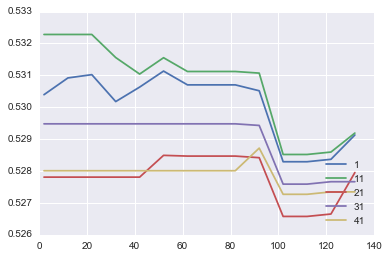

In [13]:
treez_depth11(X, y, X_test, y_true, msl= 51, mss=141)

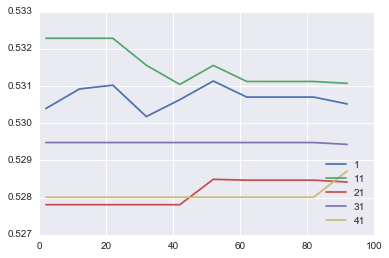

In [15]:
treez_depth11(X, y, X_test, y_true, msl=50)

In [82]:
dtc = DecisionTreeClassifier()

r1 = list(range(1, 100, 10))
r2 = list(range(2, 100, 10))
parametres = {"max_depth": [7, 8, 9, 10, 11, 12], "min_samples_leaf" : r1,  
                                      "random_state": [42], "min_samples_split" : r2}
    
ck_score = make_scorer(cohen_kappa_score)
grid = GridSearchCV(estimator=dtc,param_grid=parametres,scoring=ck_score, n_jobs=-2)

grid_fitted = grid.fit(X,y)
print(grid_fitted.best_params_)

y_pred = grid.predict(X_test)

print("kappa: ", cohen_kappa_score(y_true, y_pred))
print("accurancy: ", accuracy_score(y_true, y_pred))

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 52, 'random_state': 42}
kappa on test dataset 0.5419148302228647


In [84]:
dtc = DecisionTreeClassifier()

r1 = list(range(1, 55, 10))
r2 = list(range(40, 60, 2))
parametres = {"max_depth": [8, 9, 10, 11], "min_samples_leaf" : r1,  
                                      "random_state": [42], "min_samples_split" : r2}
    
ck_score = make_scorer(cohen_kappa_score)
grid = GridSearchCV(estimator=dtc,param_grid=parametres,scoring=ck_score, n_jobs=-2)

grid_fitted = grid.fit(X,y)
print(grid_fitted.best_params_)

y_pred = grid.predict(X_test)

print("kappa: ", cohen_kappa_score(y_true, y_pred))
print("accurancy: ", accuracy_score(y_true, y_pred))

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 50, 'random_state': 42}
kappa:  0.5424784513765002


In [6]:
dtc = DecisionTreeClassifier()

r1 = list(range(1, 10))
r2 = list(range(45, 65))
parametres = {"max_depth": [8, 9, 10], "min_samples_leaf" : r1,  
                                      "random_state": [42], "min_samples_split" : r2}
    
ck_score = make_scorer(cohen_kappa_score)
grid = GridSearchCV(estimator=dtc,param_grid=parametres,scoring=ck_score, n_jobs=-2)

grid_fitted = grid.fit(X,y)
print(grid_fitted.best_params_)

y_pred = grid.predict(X_test)

print("kappa: ", cohen_kappa_score(y_true, y_pred))
print("accurancy: ", accuracy_score(y_true, y_pred))

#"elecected best one / more regularised that previous one"

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 64, 'random_state': 42}
kappa:  0.5409871085189527
accurancy:  0.6789869952087612


In [5]:
df2 = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\binomial_target.xlsx')

In [10]:
training2, test2  = train_test_split(df2, test_size=0.2, random_state=42)
X2 = training2.iloc[:,:-1]
y2 = training2.iloc[:,-1]
X2_test = test2.iloc[:,:-1]
y2_true = test2.iloc[:,-1]

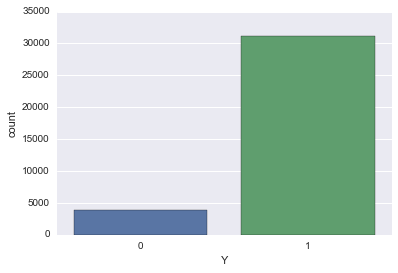

In [11]:
sns.countplot(x="Y", data=training2)

In [14]:
i = 11
tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=22, max_features= None, 
                                      random_state=42, min_samples_split=12)
tree_clf.fit(X2, y2)
y_pred = tree_clf.predict(X2_test)
kappa = cohen_kappa_score(y2_true, y_pred)
print("kappa for max_depth="+ str(i) + ": " + str(kappa))

export_graphviz(
tree_clf,
out_file="C:\\Users\\i053131\\pictures\\binomial_decisionDepth7.dot",
feature_names=X2.columns,
class_names=["0", "1", "2", "3", "4"],
rounded=True,
filled=True
)

kappa for max_depth=11: 0.49706714929822127


In [15]:
dtc = DecisionTreeClassifier()

r1 = list(range(1, 100, 10))
r2 = list(range(2, 100, 10))
parametres = {"max_depth": [9, 10, 11, 12, 13, 14, 15, 16], "min_samples_leaf" : r1,  
                                      "random_state": [42], "min_samples_split" : r2}
#voir plus bas pour le choix de la grid de profondeur 
    
ck_score2 = make_scorer(cohen_kappa_score)
grid2 = GridSearchCV(estimator=dtc,param_grid=parametres,scoring=ck_score, n_jobs=-2)

grid2_fitted = grid2.fit(X2,y2)
print(grid2_fitted.best_params_)

y2_pred = grid2.predict(X2_test)

print("kappa: ", cohen_kappa_score(y2_true, y2_pred))
print("accurancy: ", accuracy_score(y2_true, y2_pred))

{'max_depth': 12, 'min_samples_leaf': 11, 'min_samples_split': 32, 'random_state': 42}
kappa:  0.4775941247500056
accurancy:  0.906798996121378


In [16]:
dtc = DecisionTreeClassifier()

r1 = list(range(10, 50, 1))
r2 = list(range(10, 50, 1))
parametres = {"max_depth": [11, 12, 13, 14], "min_samples_leaf" : r1,  
                                      "random_state": [42], "min_samples_split" : r2}
#voir plus bas pour le choix de la grid de profondeur 
    
ck_score2 = make_scorer(cohen_kappa_score)
grid2 = GridSearchCV(estimator=dtc,param_grid=parametres,scoring=ck_score, n_jobs=-2)

grid2_fitted = grid2.fit(X2,y2)
print(grid2_fitted.best_params_)

y2_pred = grid2.predict(X2_test)

print("kappa: ", cohen_kappa_score(y2_true, y2_pred))
print("accurancy: ", accuracy_score(y2_true, y2_pred))

{'max_depth': 14, 'min_samples_leaf': 11, 'min_samples_split': 24, 'random_state': 42}
kappa:  0.4948047233694314
accurancy:  0.9075975359342916


In [22]:
i=11
rnd_clf2 = RandomForestClassifier(max_depth=i, min_samples_leaf=20, max_features= None, 
                                 random_state=42, min_samples_split=20, n_estimators=500, n_jobs=-2)
rnd_clf2.fit(X2, y2)
y2_pred_rf = rnd_clf2.predict(X2_test)

print("kappa for max_depth="+ str(i) + ": " + str(cohen_kappa_score(y2_true, y2_pred_rf)))
print("accurancy: ", accuracy_score(y2_true, y2_pred_rf))


kappa for max_depth=11: 0.49075165683069333
accurancy:  0.9231120237280401


In [23]:
# hyperparam from grid search on tree with parcimonie
#{'max_depth': 12, 'min_samples_leaf': 11, 'min_samples_split': 32, 'random_state': 42}
#kappa 0.4983383315976704
#accurancy:  0.9236824093086927

# note 
#kappa for #RandomForestClassifier(max_depth=i, min_samples_leaf=20, random_state=42, min_samples_split=20, n_estimators=500)
#kappa for max_depth=11: 0.49075165683069333
#accurancy:  0.9231120237280401



rnd_clf2 = RandomForestClassifier(max_depth=12, min_samples_leaf=11, max_features= None, 
                                 random_state=42, min_samples_split=32, n_estimators=500, n_jobs=-2)
rnd_clf2.fit(X2, y2)
y2_pred_rf = rnd_clf2.predict(X2_test)
kappa_rf2 = cohen_kappa_score(y2_true, y2_pred_rf)
print("kappa", kappa_rf2)
print("accurancy: ", accuracy_score(y2_true, y2_pred_rf))

kappa 0.4983383315976704
accurancy:  0.9236824093086927


In [24]:
i=11
rnd_clf2 = RandomForestClassifier(max_depth=i, min_samples_leaf=20, max_features= None, 
                                 random_state=42, min_samples_split=20, n_estimators=1500, n_jobs=-2)
rnd_clf2.fit(X2, y2)
y2_pred_rf = rnd_clf2.predict(X2_test)

print("kappa for max_depth="+ str(i) + ": " + str(cohen_kappa_score(y2_true, y2_pred_rf)))
print("accurancy: ", accuracy_score(y2_true, y2_pred_rf))

kappa for max_depth=11: 0.48607339097513114
accurancy:  0.9225416381473877


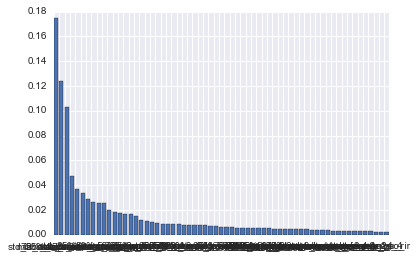

,importance
std_accelerometer_z,0.174881
std_po_ir,0.123702
min_accelerometer_x,0.102806
75%_accelerometer_x,0.047443
25%_accelerometer_z,0.036845
25%_po_ir,0.033835
max_accelerometer_x,0.028844
std_accelerometer_x,0.026300
25%_accelerometer_x,0.025486
50%_eeg_1,0.025261


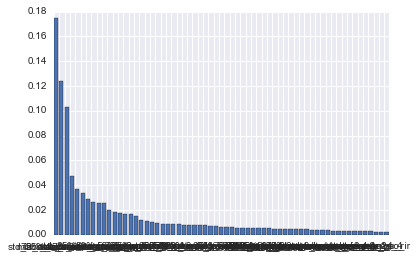

In [25]:
importances2 = rnd_clf2.feature_importances_
feature_importances2 = pd.DataFrame(importances2, index = X2.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances2.index, feature_importances2["importance"])
plt.show()

plt.bar(feature_importances2.index, feature_importances2["importance"])

feature_importances2.head(10)


<BarContainer object of 63 artists>

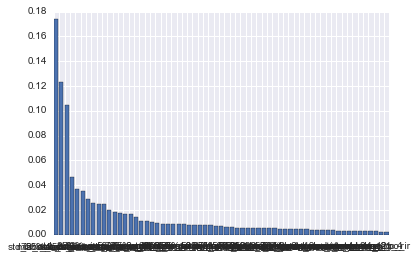

In [57]:
feature_importances2.index
plt.bar(feature_importances2.index, feature_importances2["importance"])

min_sample_slit: 2


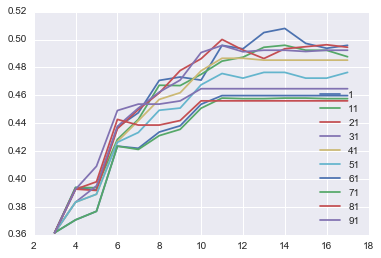

min_sample_slit: 12


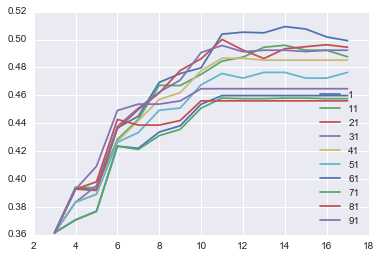

min_sample_slit: 22


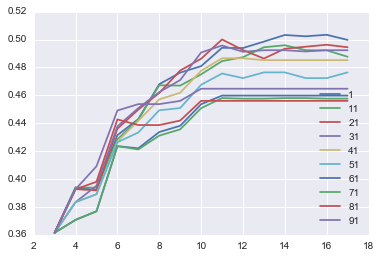

min_sample_slit: 32


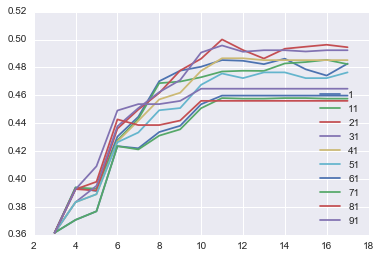

min_sample_slit: 42


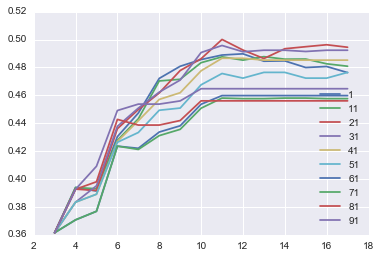

min_sample_slit: 52


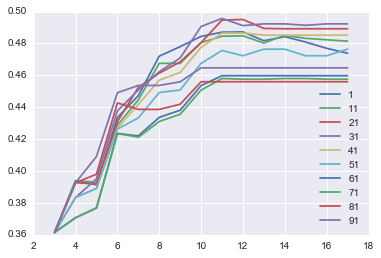

min_sample_slit: 62


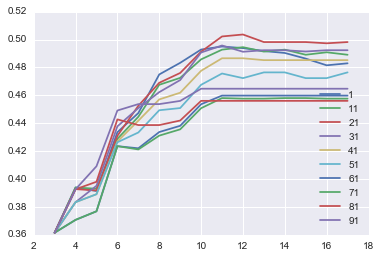

min_sample_slit: 72


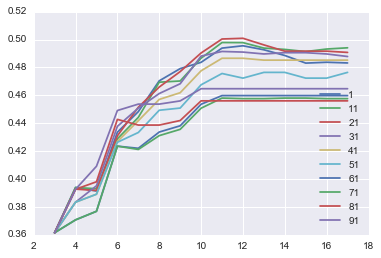

min_sample_slit: 82


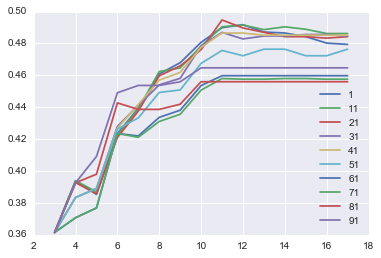

min_sample_slit: 92


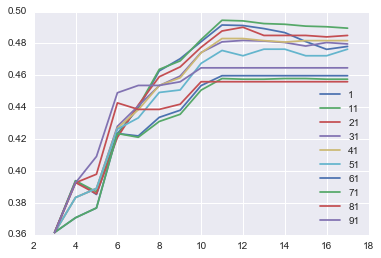

In [19]:
treez(X2, y2, X2_test, y2_true)

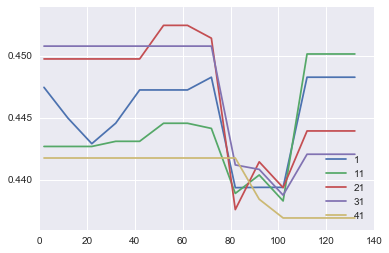

In [20]:
treez_depth11(X2, y2, X2_test, y2_true, d=11, msl= 51, mss=141)